In [1]:
import matplotlib.pyplot as plt
def plot_behaviers(file_name):
    # plot actions
    file=open(file_name,"r")
    actions=[]
    for line in file.readlines():
        action=line.split(",")
        for a in action:
            actions.append(a)
    lst=[]
    for a in actions:
        b=a.strip('[').strip(']').split(" ")
        lst.append(b)
    action_values=[]
    for l in lst:
        for s in l:
            if (s!='0.' and s!=""):
                    if s!=']':
                        s=s.rstrip("]")
                        action_values.append(float(s))  
    return action_values

In [2]:
def plot_rewards(file_name):
    f=open(file_name,"r")
    R=[]
    for l in f:
        for r in l.split(','):
            R.append(r)
    Rewards=[]
    for r in R:
        if r!='':
            Rewards.append(float(r))
    plt.figure(figsize=(20,8))
    plt.plot(Rewards)

In [3]:
def plot_vel(file_name):
    f=open(file_name,"r")
    R=[]
    for l in f:
        for r in l.split(','):
            R.append(r)
    vels=[]
    for r in R:
        if r!='':
            vels.append(float(r))
    return(vels)
    

#### 奖励函数
```
        """速度惩罚"""
        if abs(self.velocity)>10:
            reward-=50
        if pose.position.z < self.target_z/2:
            if self.velocity <=0.0:
                reward-=10

        if pose.position.z < self.target_z:
            """飞行方向惩罚"""
            if pose.orientation.z!=0.0:
                punish=(pose.orientation.z/abs(pose.orientation.z))*5
                reward+=min(0,punish) 
        elif pose.position.z > self.target_z:
            """高度偏离惩罚"""
            reward+=-abs(self.target_z-pose.position.z)*10
            if self.velocity < 0:
                reward+=50
            elif self.velocity > 0:
                reward-=50
            
        """高度目标奖励,速度目标奖励（0.0)"""
        if timestamp > 1: 
            if abs(pose.position.z-self.target_z) < 0.3:
                self.target_hit+=1
                reward+=10*(self.target_hit)**2
                if self.velocity==0.0:
                    reward+=50

        """阶段结束条件"""
        if pose.position.z > self.height_limit:
            reward-=2000
            done=True
        if timestamp > self.max_duration:
            done=True
```   
#### DDPG模型
* <div style="color:red"> states取5维  [z,ox,oy,oz,vel]</div>
* soft update 参数 0.001
* gamma 0.99
* Memory   按优先级存储/取样
   * 容量 1000
   * 一次取样量 100
   
* Actor  
   * 优化器 Adam: lr=0.0001  
   * 网络结构 2 hidden-layers(300-200)+ Dropout(0.3)
   * 激活函数 relu
   * 批归一化
* Critic
   * 优化器 Adadelta(默认)
   * l2正则化(10-5)
   * 网络结构 state:（400-300）+ actions:300

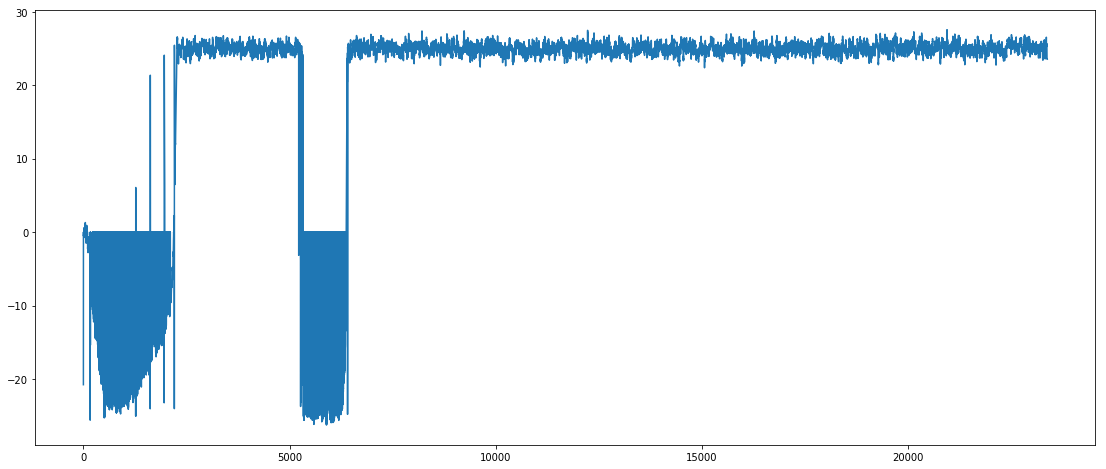

In [9]:
action_values=plot_behaviers("actions_01.txt")
plt.figure(figsize=(19,8))
plt.plot(action_values)

(-20, 100)

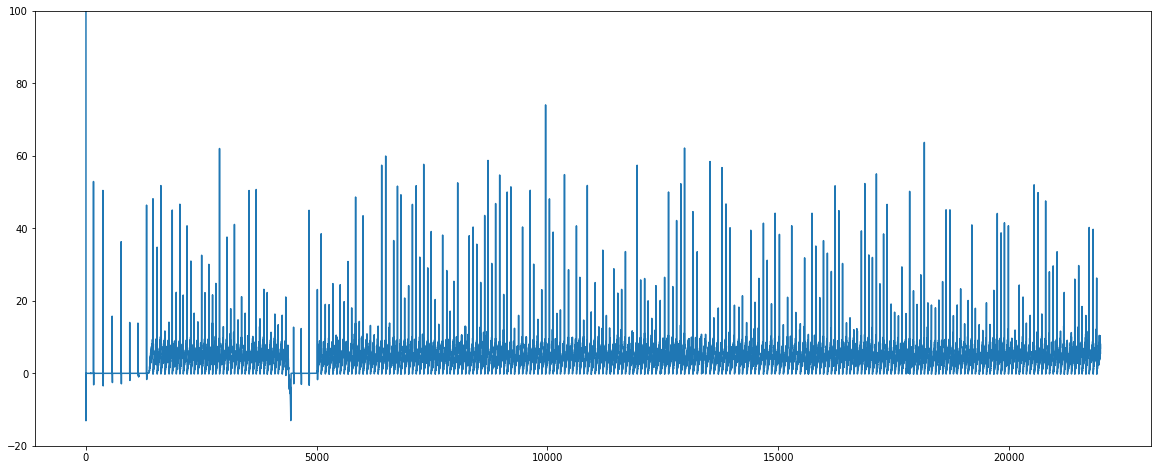

In [13]:
vels=plot_vel("states_01.txt")
plt.figure(figsize=(20,8))
plt.plot(vels)
#plt.xlim(left=6000,right=8000)
plt.ylim(bottom=-20,top=100)

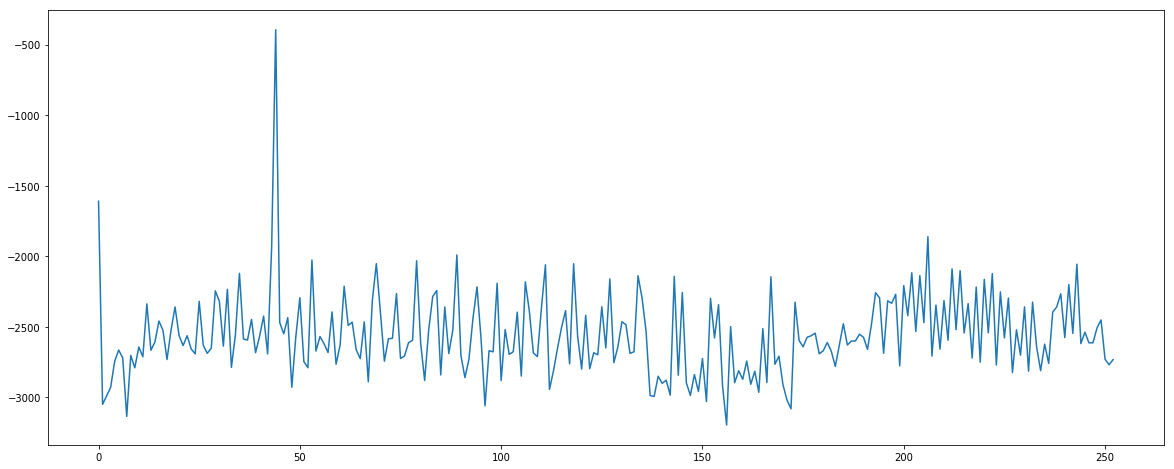

In [14]:
plot_rewards("rewards_01.txt")

* Crtic 结构改成  300+200（states） - 200（actions）

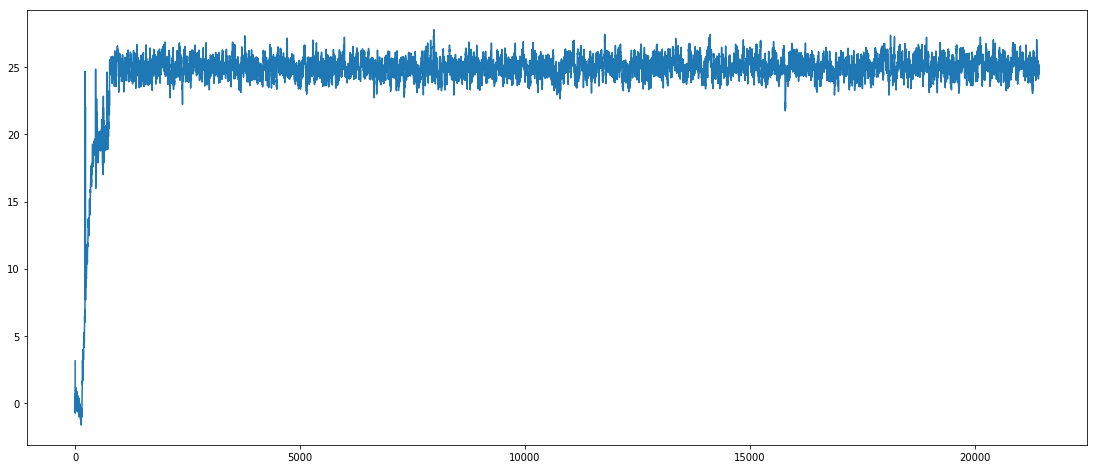

In [15]:
action_values=plot_behaviers("actions_02.txt")
plt.figure(figsize=(19,8))
plt.plot(action_values)

(-5, 50)

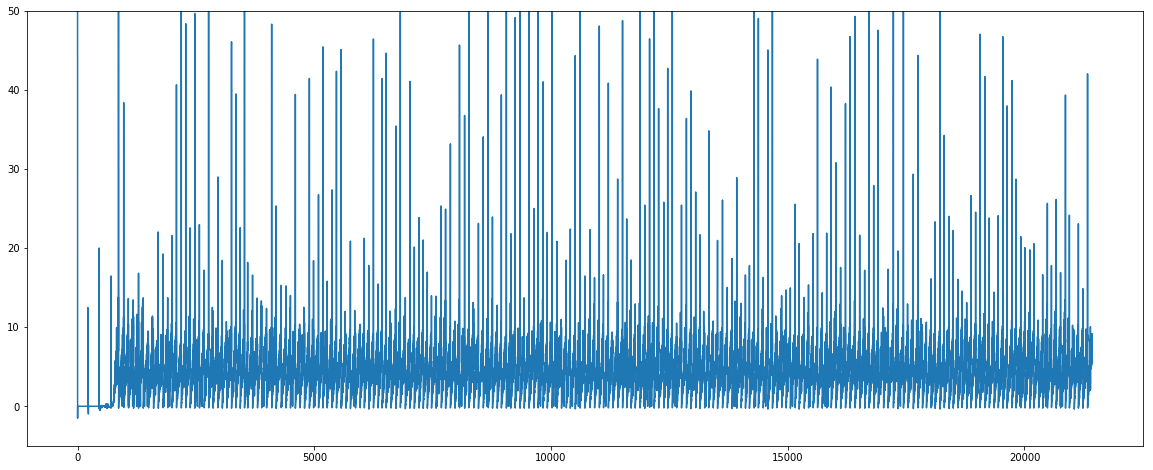

In [18]:
vels=plot_vel("states_02.txt")
plt.figure(figsize=(20,8))
plt.plot(vels)
#plt.xlim(left=6000,right=8000)
plt.ylim(bottom=-5,top=50)

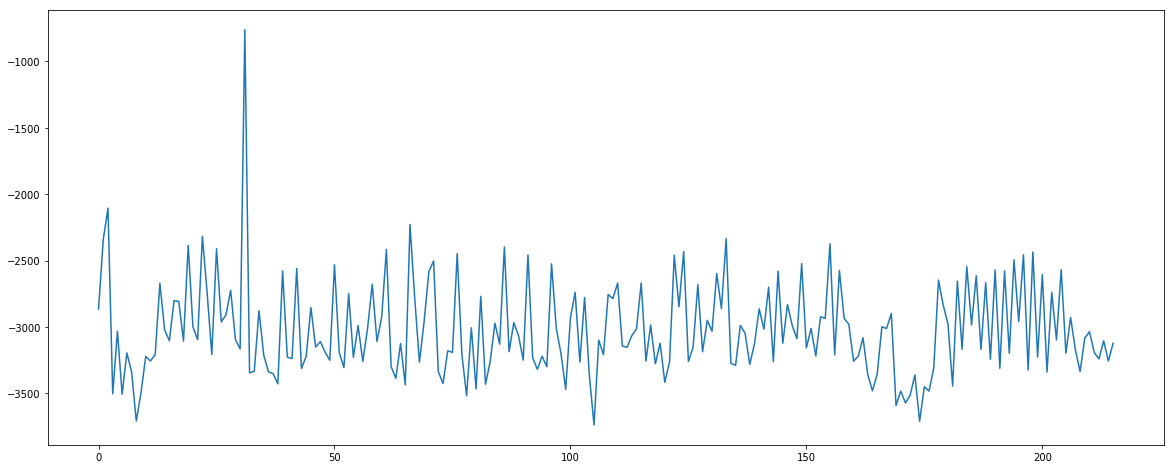

In [19]:
plot_rewards("rewards_02.txt")

* Actor再加一层 Dropout（中间，0.3）

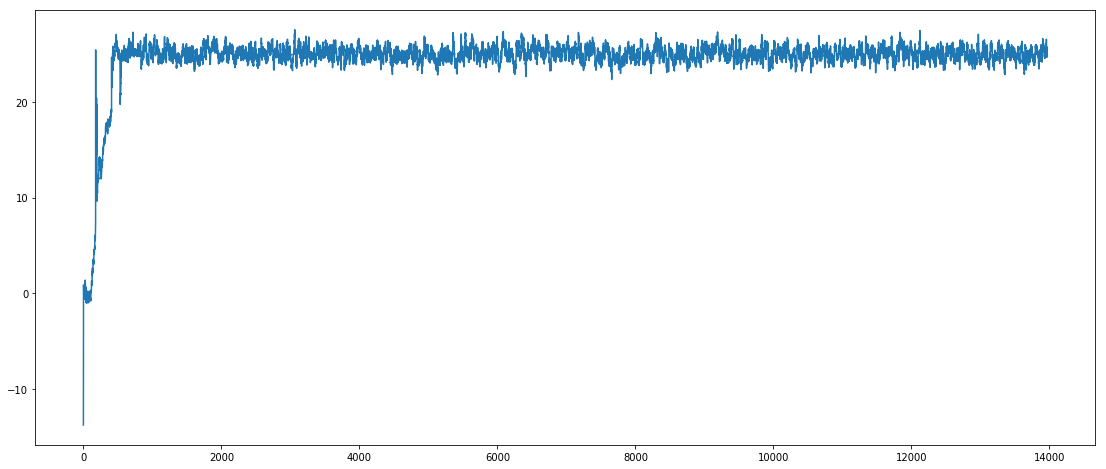

In [21]:
action_values=plot_behaviers("actions_03.txt")
plt.figure(figsize=(19,8))
plt.plot(action_values)

(-5, 50)

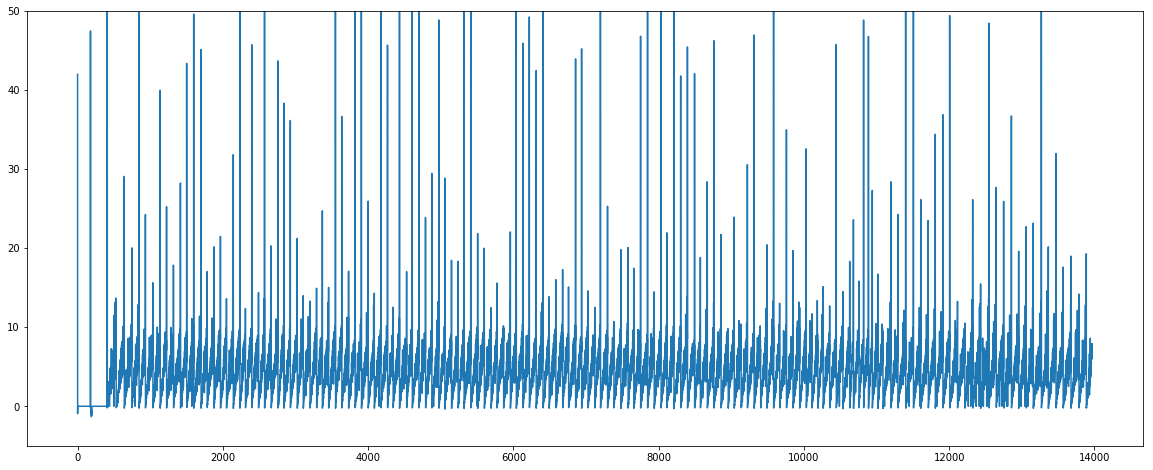

In [22]:
vels=plot_vel("states_03.txt")
plt.figure(figsize=(20,8))
plt.plot(vels)
#plt.xlim(left=6000,right=8000)
plt.ylim(bottom=-5,top=50)

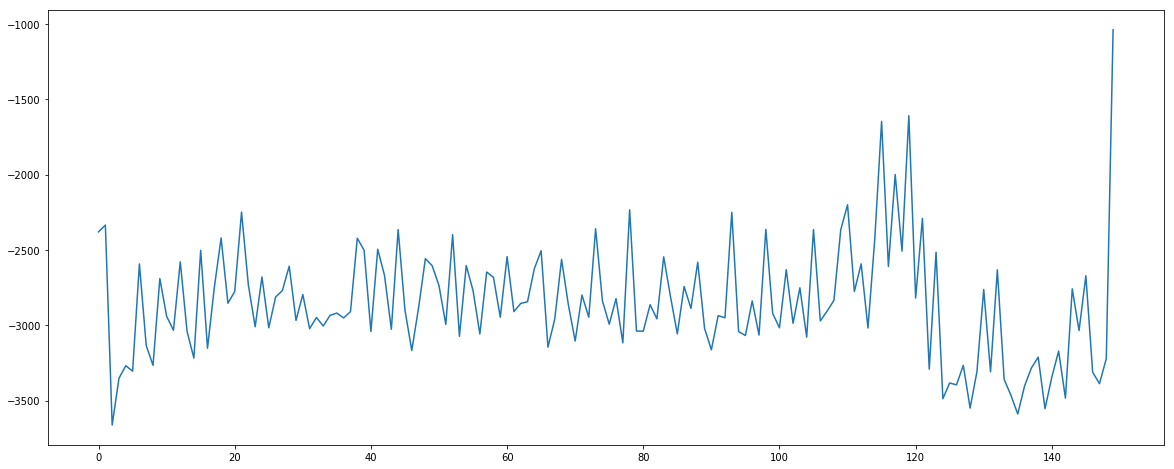

In [23]:
plot_rewards("rewards_03.txt")

* 增大速度惩罚

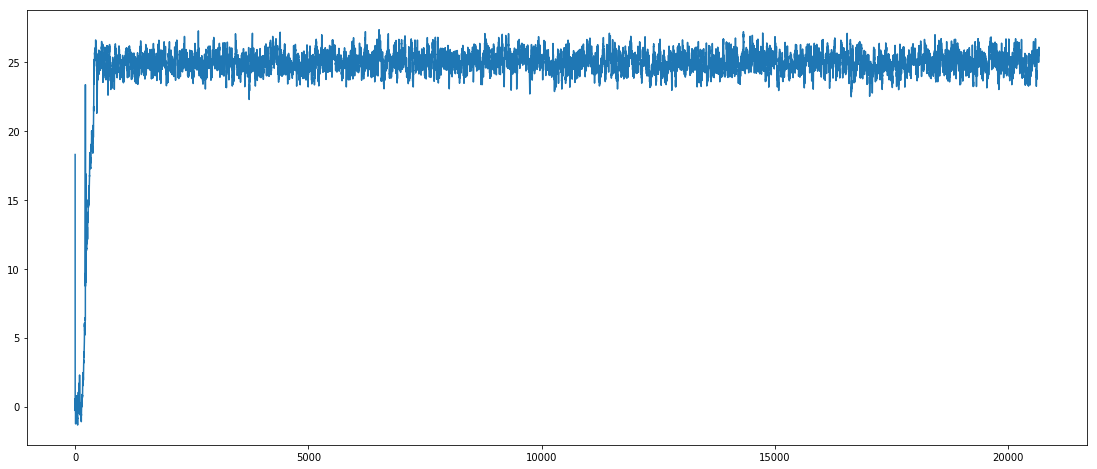

In [27]:
action_values=plot_behaviers("actions_04.txt")
plt.figure(figsize=(19,8))
plt.plot(action_values)

(-5, 50)

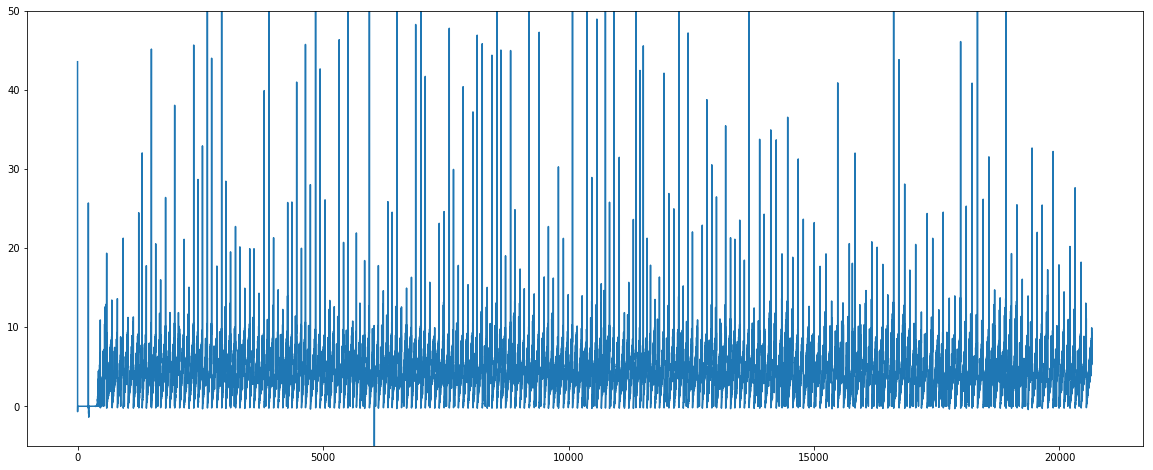

In [28]:
vels=plot_vel("states_04.txt")
plt.figure(figsize=(20,8))
plt.plot(vels)
#plt.xlim(left=6000,right=8000)
plt.ylim(bottom=-5,top=50)

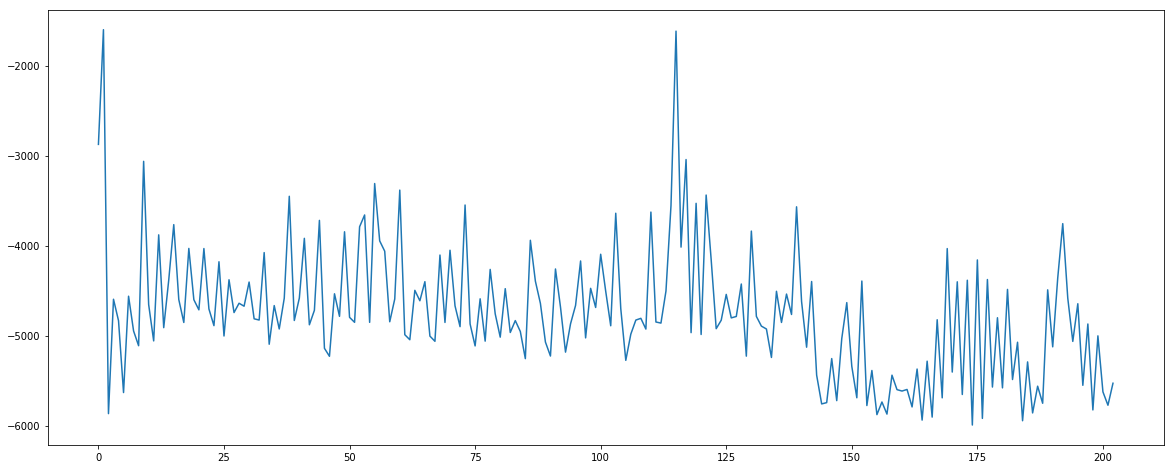

In [29]:
plot_rewards("rewards_04.txt")

* 进一步减小Actor模型size：200+100  
保留两层 Dropout(0.3)

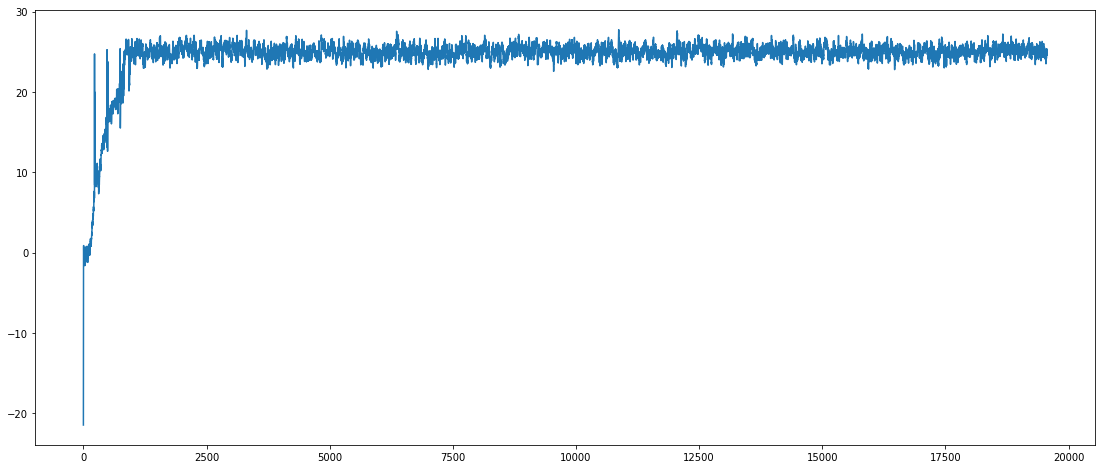

In [30]:
action_values=plot_behaviers("actions_05.txt")
plt.figure(figsize=(19,8))
plt.plot(action_values)

(-5, 50)

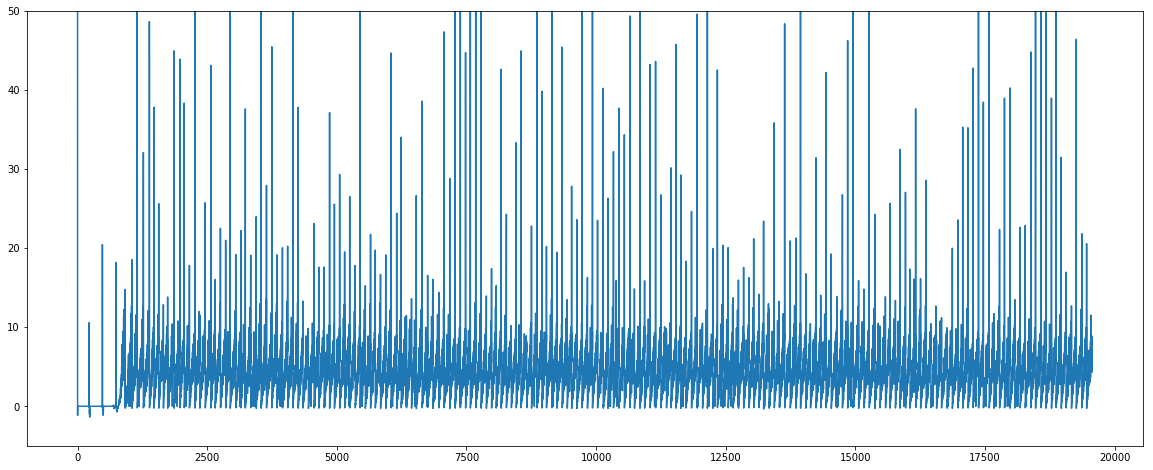

In [31]:
vels=plot_vel("states_05.txt")
plt.figure(figsize=(20,8))
plt.plot(vels)
#plt.xlim(left=6000,right=8000)
plt.ylim(bottom=-5,top=50)

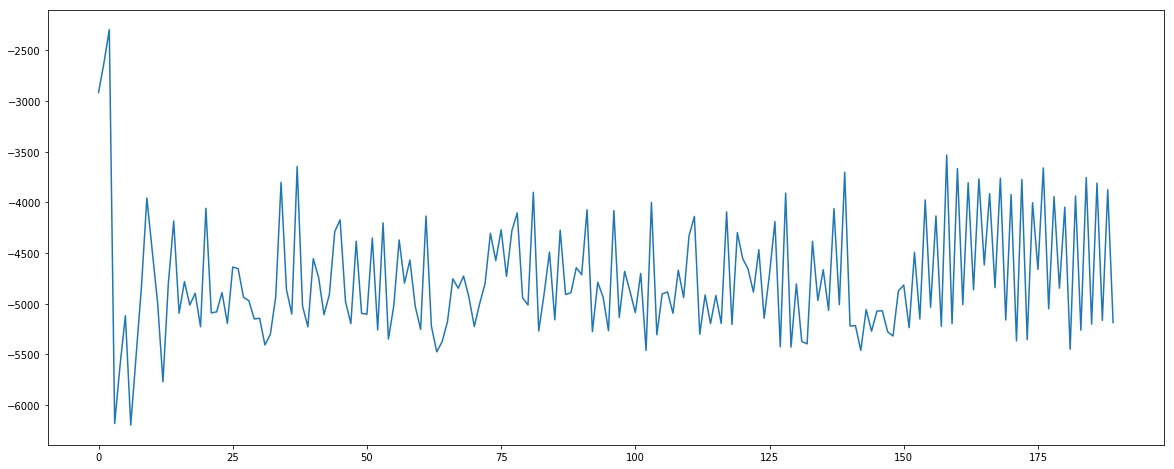

In [32]:
plot_rewards("rewards_05.txt")

* Actor 网络size改回 400-300，保留两层0.3的Dropout

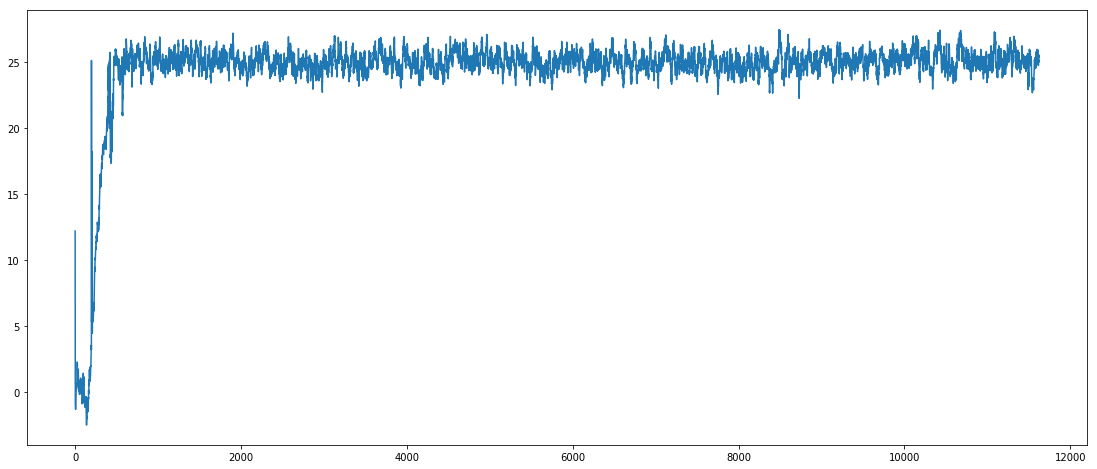

In [33]:
action_values=plot_behaviers("actions_06.txt")
plt.figure(figsize=(19,8))
plt.plot(action_values)

(-5, 50)

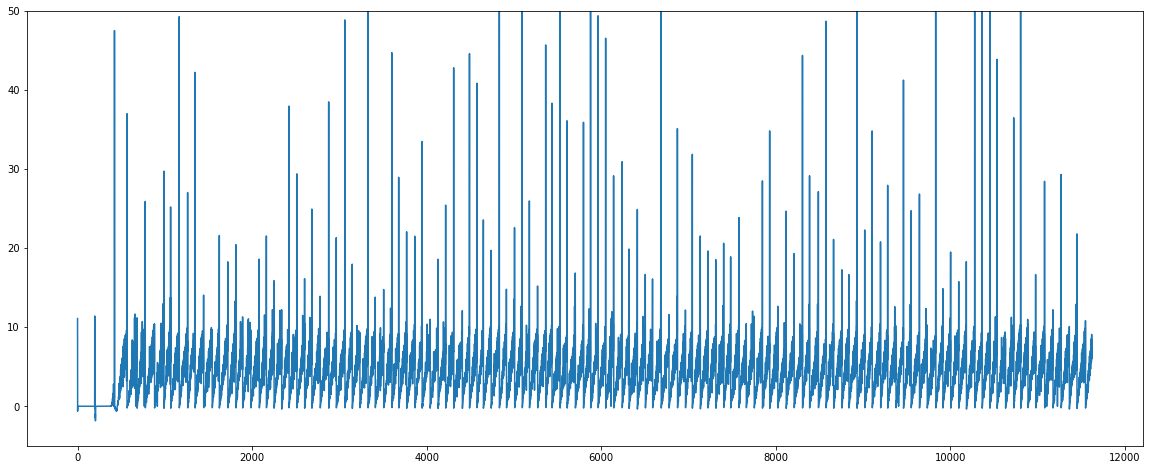

In [34]:
vels=plot_vel("states_06.txt")
plt.figure(figsize=(20,8))
plt.plot(vels)
#plt.xlim(left=6000,right=8000)
plt.ylim(bottom=-5,top=50)

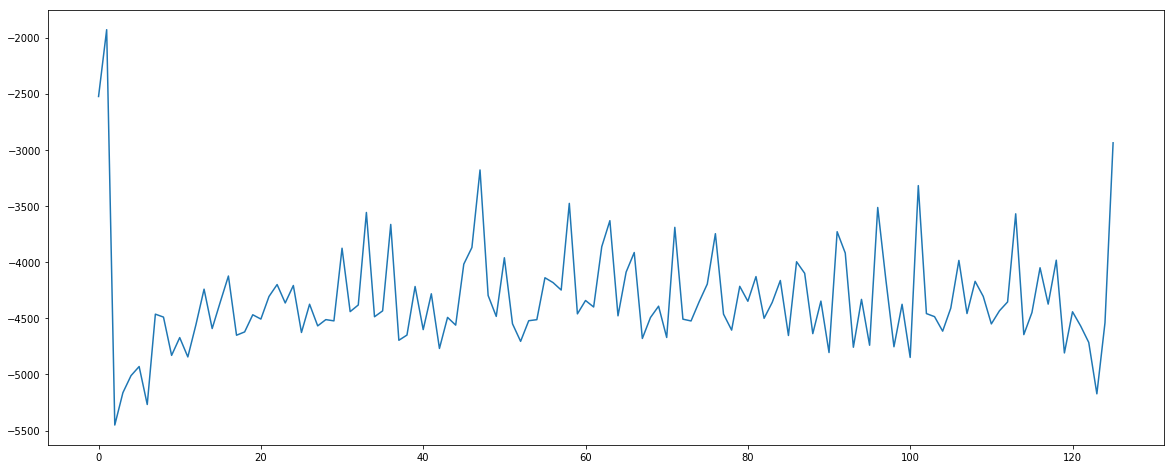

In [35]:
plot_rewards("rewards_06.txt")

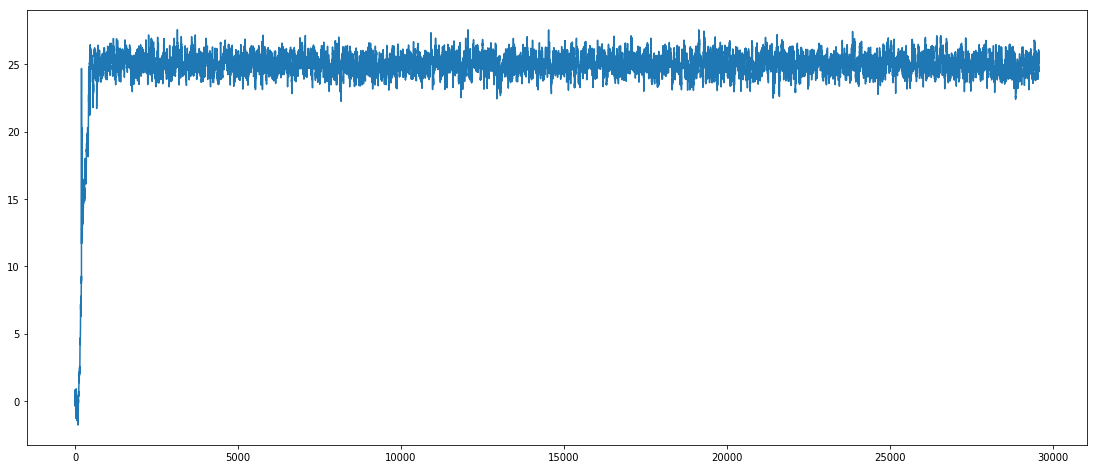

In [36]:
action_values=plot_behaviers("actions_07.txt")
plt.figure(figsize=(19,8))
plt.plot(action_values)

(-5, 50)

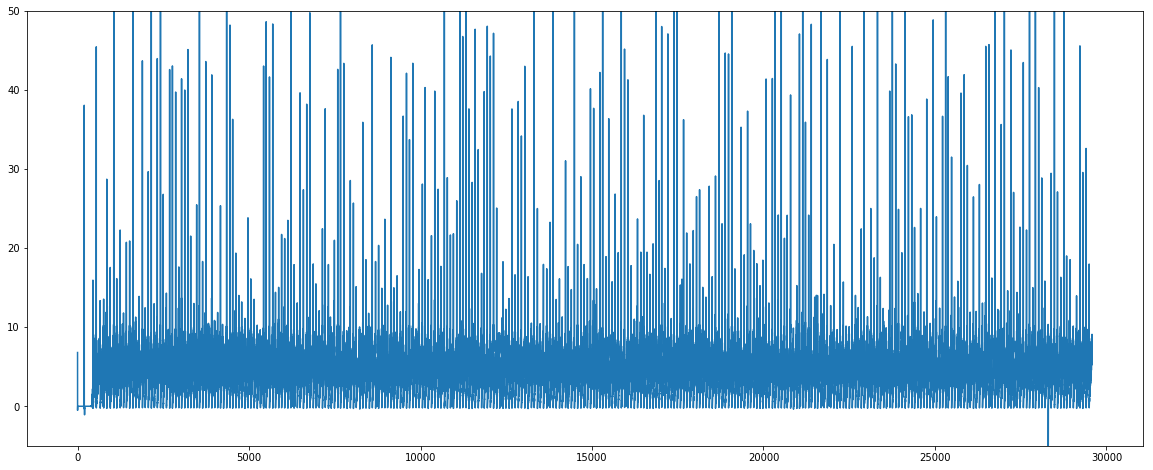

In [37]:
vels=plot_vel("states_07.txt")
plt.figure(figsize=(20,8))
plt.plot(vels)
#plt.xlim(left=6000,right=8000)
plt.ylim(bottom=-5,top=50)

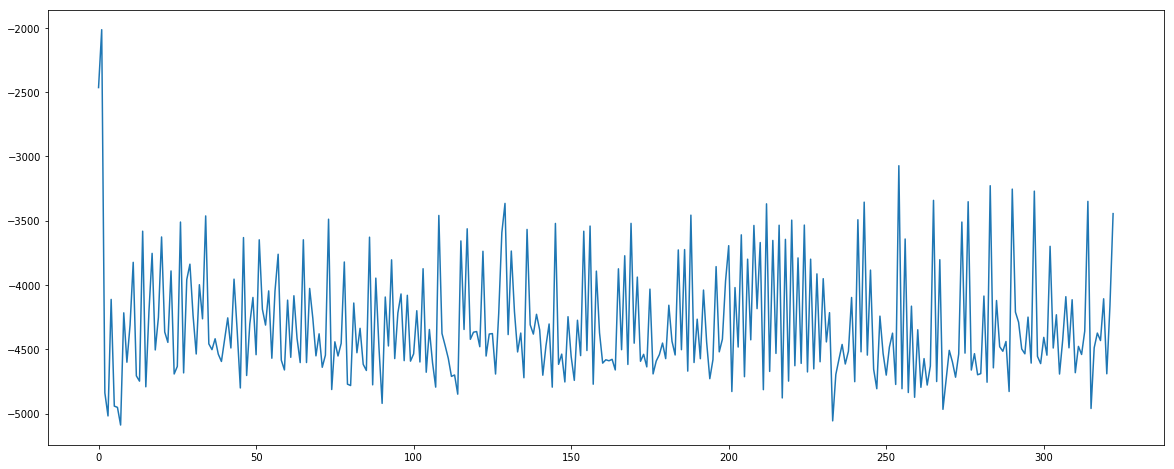

In [38]:
plot_rewards("rewards_07.txt")

#### DDPG模型还原
* Actor 400+300
* Critic 400+300-300
* 不加Dropout

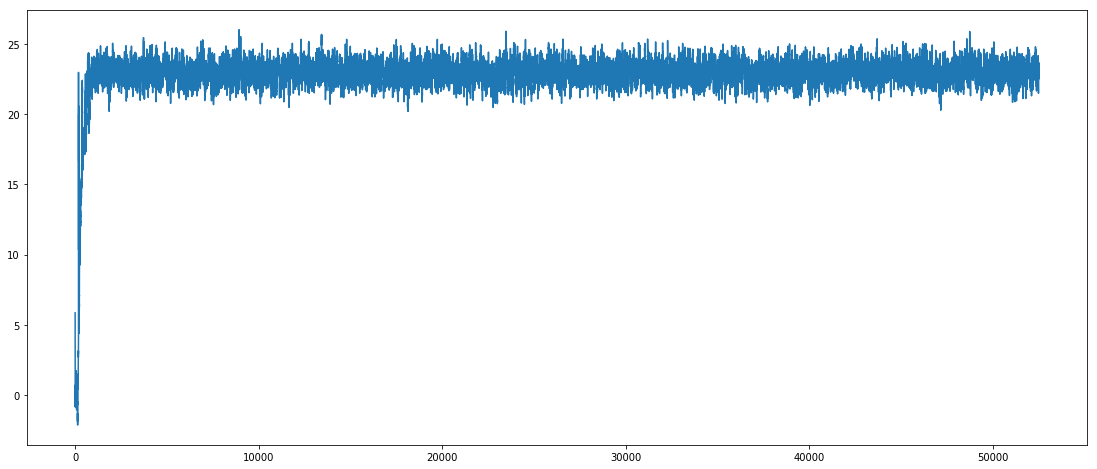

In [4]:
action_values=plot_behaviers("actions_08.txt")
plt.figure(figsize=(19,8))
plt.plot(action_values)

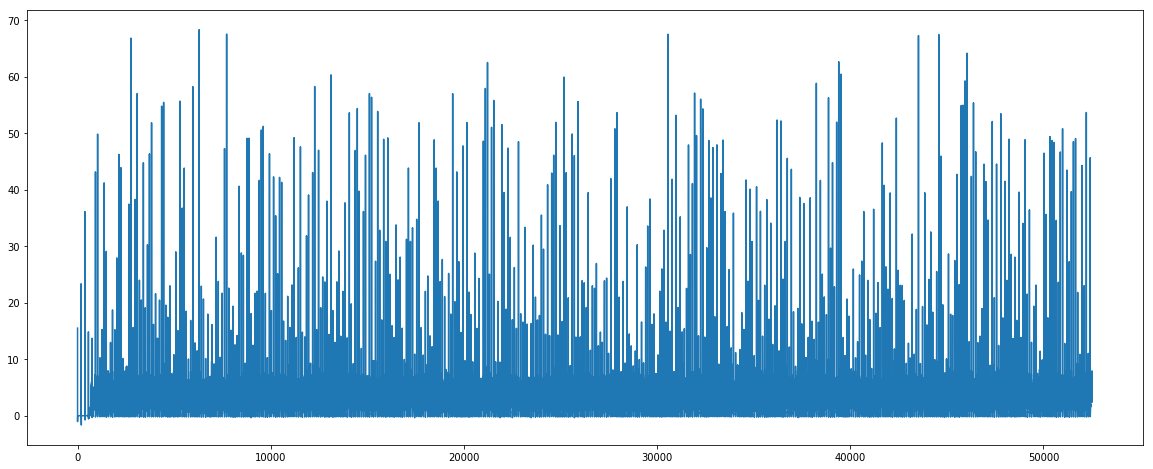

In [7]:
vels=plot_vel("states_08.txt")
plt.figure(figsize=(20,8))
plt.plot(vels)
#plt.xlim(left=6000,right=8000)
#plt.ylim(bottom=-5,top=50)

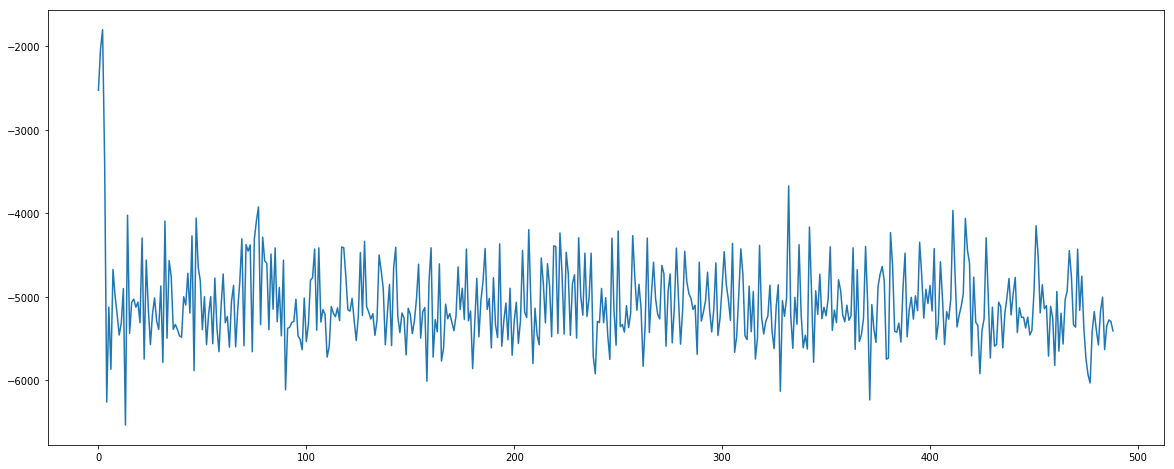

In [6]:
plot_rewards("rewards_08.txt")